In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [123]:
data=pd.read_csv("http://www.stat.ufl.edu/~winner/data/airq402.dat",header=None,sep='\s{1,}', engine='python')
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10
827,LGA,PWM,167.42,284,199.78,DL,38.35,144.73,AA,20.83,142.36
51,ATL,JAX,94.79,270,828.80,DL,79.46,97.25,FL,20.00,84.17
247,CLT,LAS,174.90,1917,272.50,US,53.84,166.02,AA,14.12,165.36
962,STL,SEA,215.62,1710,355.21,AA,76.37,218.32,UA,9.05,189.66
491,DTW,PHL,210.02,453,591.95,NW,57.05,214.53,US,39.47,203.09
11,ABQ,BWI,173.56,1670,312.39,WN,49.16,180.49,AA,14.37,161.39
411,DFW,MCO,189.56,984,1009.89,AA,55.45,195.72,DL,31.23,177.98
338,CLE,BDL,200.44,475,190.00,CO,64.47,222.30,WN,22.19,152.28
754,MIA,LGA,159.93,1097,3698.26,AA,68.47,157.66,AA,68.47,157.66
753,MIA,MSY,171.97,674,195.21,AA,85.63,166.59,FL,3.61,165.52


In [124]:
data.describe()

,2,3,4,6,7,9,10
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [125]:
data.columns=['city1','city2','avg_Fare','distance','avg_weekly_passenger','mr_lead_airline','mr_share','Avg_fare1','low_price_airline','mr_share1','price']
data.head(10)

,city1,city2,avg_Fare,distance,avg_weekly_passenger,mr_lead_airline,mr_share,Avg_fare1,low_price_airline,mr_share1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [126]:
data.dtypes

city1                    object
city2                    object
avg_Fare                float64
distance                  int64
avg_weekly_passenger    float64
mr_lead_airline          object
mr_share                float64
Avg_fare1               float64
low_price_airline        object
mr_share1               float64
price                   float64
dtype: object

In [0]:
labelencoder=LabelEncoder()
data['city1'] = labelencoder.fit_transform(data['city1'])
data['city2'] = labelencoder.fit_transform(data['city2'])
data['mr_lead_airline'] = labelencoder.fit_transform(data['mr_lead_airline'])
data['low_price_airline'] = labelencoder.fit_transform(data['low_price_airline'])

In [129]:
data.dtypes

city1                     int64
city2                     int64
avg_Fare                float64
distance                  int64
avg_weekly_passenger    float64
mr_lead_airline           int64
mr_share                float64
Avg_fare1               float64
low_price_airline         int64
mr_share1               float64
price                   float64
dtype: object

In [131]:
data.head(10)

,city1,city2,avg_Fare,distance,avg_weekly_passenger,mr_lead_airline,mr_share,Avg_fare1,low_price_airline,mr_share1,price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42
5,2,18,135.17,1204,199.02,14,40.68,137.97,6,17.09,127.69
6,2,32,152.85,2237,237.17,14,59.94,148.59,17,59.94,148.59
7,2,33,190.73,2467,191.95,4,17.89,205.06,16,16.59,174.00
8,2,40,129.35,1073,550.54,14,76.84,127.69,17,76.84,127.69
9,2,82,134.17,1130,202.93,13,35.40,132.91,6,26.40,124.78


In [0]:
data_z = data.drop(['city1','city2','mr_lead_airline','low_price_airline'],axis=1)

In [0]:
z=np.abs(stats.zscore(data_z))

In [142]:
z[z>3]

array([ 7.19604821,  3.62493096,  4.28523448,  5.20865928,  3.07817338,
        3.46552713,  3.88786679,  5.18470473,  3.05444736,  3.2329132 ,
        4.50014269,  8.83626635,  3.09415192,  3.06279978,  3.0847404 ,
        4.44196763,  3.37946683, 10.80549923,  3.71996778,  3.30654244,
        3.01610542,  6.53718338,  3.44797334,  3.60703743,  3.5815419 ,
        4.04450398,  4.49707392,  3.94966594,  3.1904241 ,  3.66390942,
        3.47706704,  8.04801194,  3.12575737,  3.66033075,  3.65272123,
        3.51359809,  3.65247009,  3.59596889,  4.80105536,  4.08558177,
        3.01484046,  4.37023271,  4.29823129,  5.16347796,  3.85529392])

In [0]:
data_Q = data[(z < 3).all(axis=1)]

In [137]:
data_Q.shape

(966, 11)

In [138]:
data_Q.describe()

,city1,city2,avg_Fare,distance,avg_weekly_passenger,mr_lead_airline,mr_share,Avg_fare1,low_price_airline,mr_share1,price
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,35.461698,50.433747,161.170404,1038.634576,591.785839,8.210145,60.600507,163.874576,10.136646,34.691884,141.278033
std,23.306520,22.443556,51.726169,626.661777,494.415258,5.356159,19.314748,57.242531,6.070396,27.273184,43.507866
min,0.000000,0.000000,50.520000,108.000000,181.410000,0.000000,17.680000,50.520000,0.000000,1.060000,49.610000
25%,14.000000,33.000000,125.192500,550.000000,254.400000,4.000000,47.012500,124.115000,6.000000,13.097500,113.430000
50%,31.000000,53.000000,160.445000,902.000000,391.900000,10.000000,59.625000,161.220000,10.000000,26.285000,137.435000
75%,54.750000,72.000000,195.142500,1413.750000,717.412500,14.000000,74.410000,201.200000,16.000000,53.150000,167.117500
max,89.000000,84.000000,321.400000,2724.000000,2885.760000,15.000000,100.000000,354.080000,18.000000,100.000000,273.630000


In [147]:
corr=data_Q.corr()
corr

,city1,city2,avg_Fare,distance,avg_weekly_passenger,mr_lead_airline,mr_share,Avg_fare1,low_price_airline,mr_share1,price
city1,1.000000,0.295987,-0.095083,0.031700,0.069733,0.058426,-0.077810,-0.111549,0.035810,0.098501,-0.042035
city2,0.295987,1.000000,-0.043443,0.145114,-0.034530,-0.002112,-0.067977,-0.049677,0.021812,0.057720,0.017959
avg_Fare,-0.095083,-0.043443,1.000000,0.552015,-0.222121,-0.335088,-0.228129,0.981103,-0.171226,-0.476023,0.859362
distance,0.031700,0.145114,0.552015,1.000000,-0.164635,-0.165824,-0.533325,0.526077,-0.194347,-0.365148,0.557689
avg_weekly_passenger,0.069733,-0.034530,-0.222121,-0.164635,1.000000,0.043565,0.032822,-0.190827,0.062482,0.078109,-0.254185
mr_lead_airline,0.058426,-0.002112,-0.335088,-0.165824,0.043565,1.000000,0.115983,-0.314923,0.281880,0.180273,-0.305649
mr_share,-0.077810,-0.067977,-0.228129,-0.533325,0.032822,0.115983,1.000000,-0.214354,0.148797,0.298800,-0.314585
Avg_fare1,-0.111549,-0.049677,0.981103,0.526077,-0.190827,-0.314923,-0.214354,1.000000,-0.163372,-0.499622,0.817292
low_price_airline,0.035810,0.021812,-0.171226,-0.194347,0.062482,0.281880,0.148797,-0.163372,1.000000,0.214277,-0.218083
mr_share1,0.098501,0.057720,-0.476023,-0.365148,0.078109,0.180273,0.298800,-0.499622,0.214277,1.000000,-0.249619


In [146]:
data_Q.columns[data_Q.apply(lambda col: ((col.corr(data_Q['avg_Fare']) < 0.1) & (col.corr(data_Q['avg_Fare']) > -0.1)))]

Index(['city1', 'city2'], dtype='object')

In [0]:
data_Q.drop(['city1', 'city2'],axis=1,inplace=True)

In [151]:
data_Q.head()

,avg_Fare,distance,avg_weekly_passenger,mr_lead_airline,mr_share,Avg_fare1,low_price_airline,mr_share1,price
0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


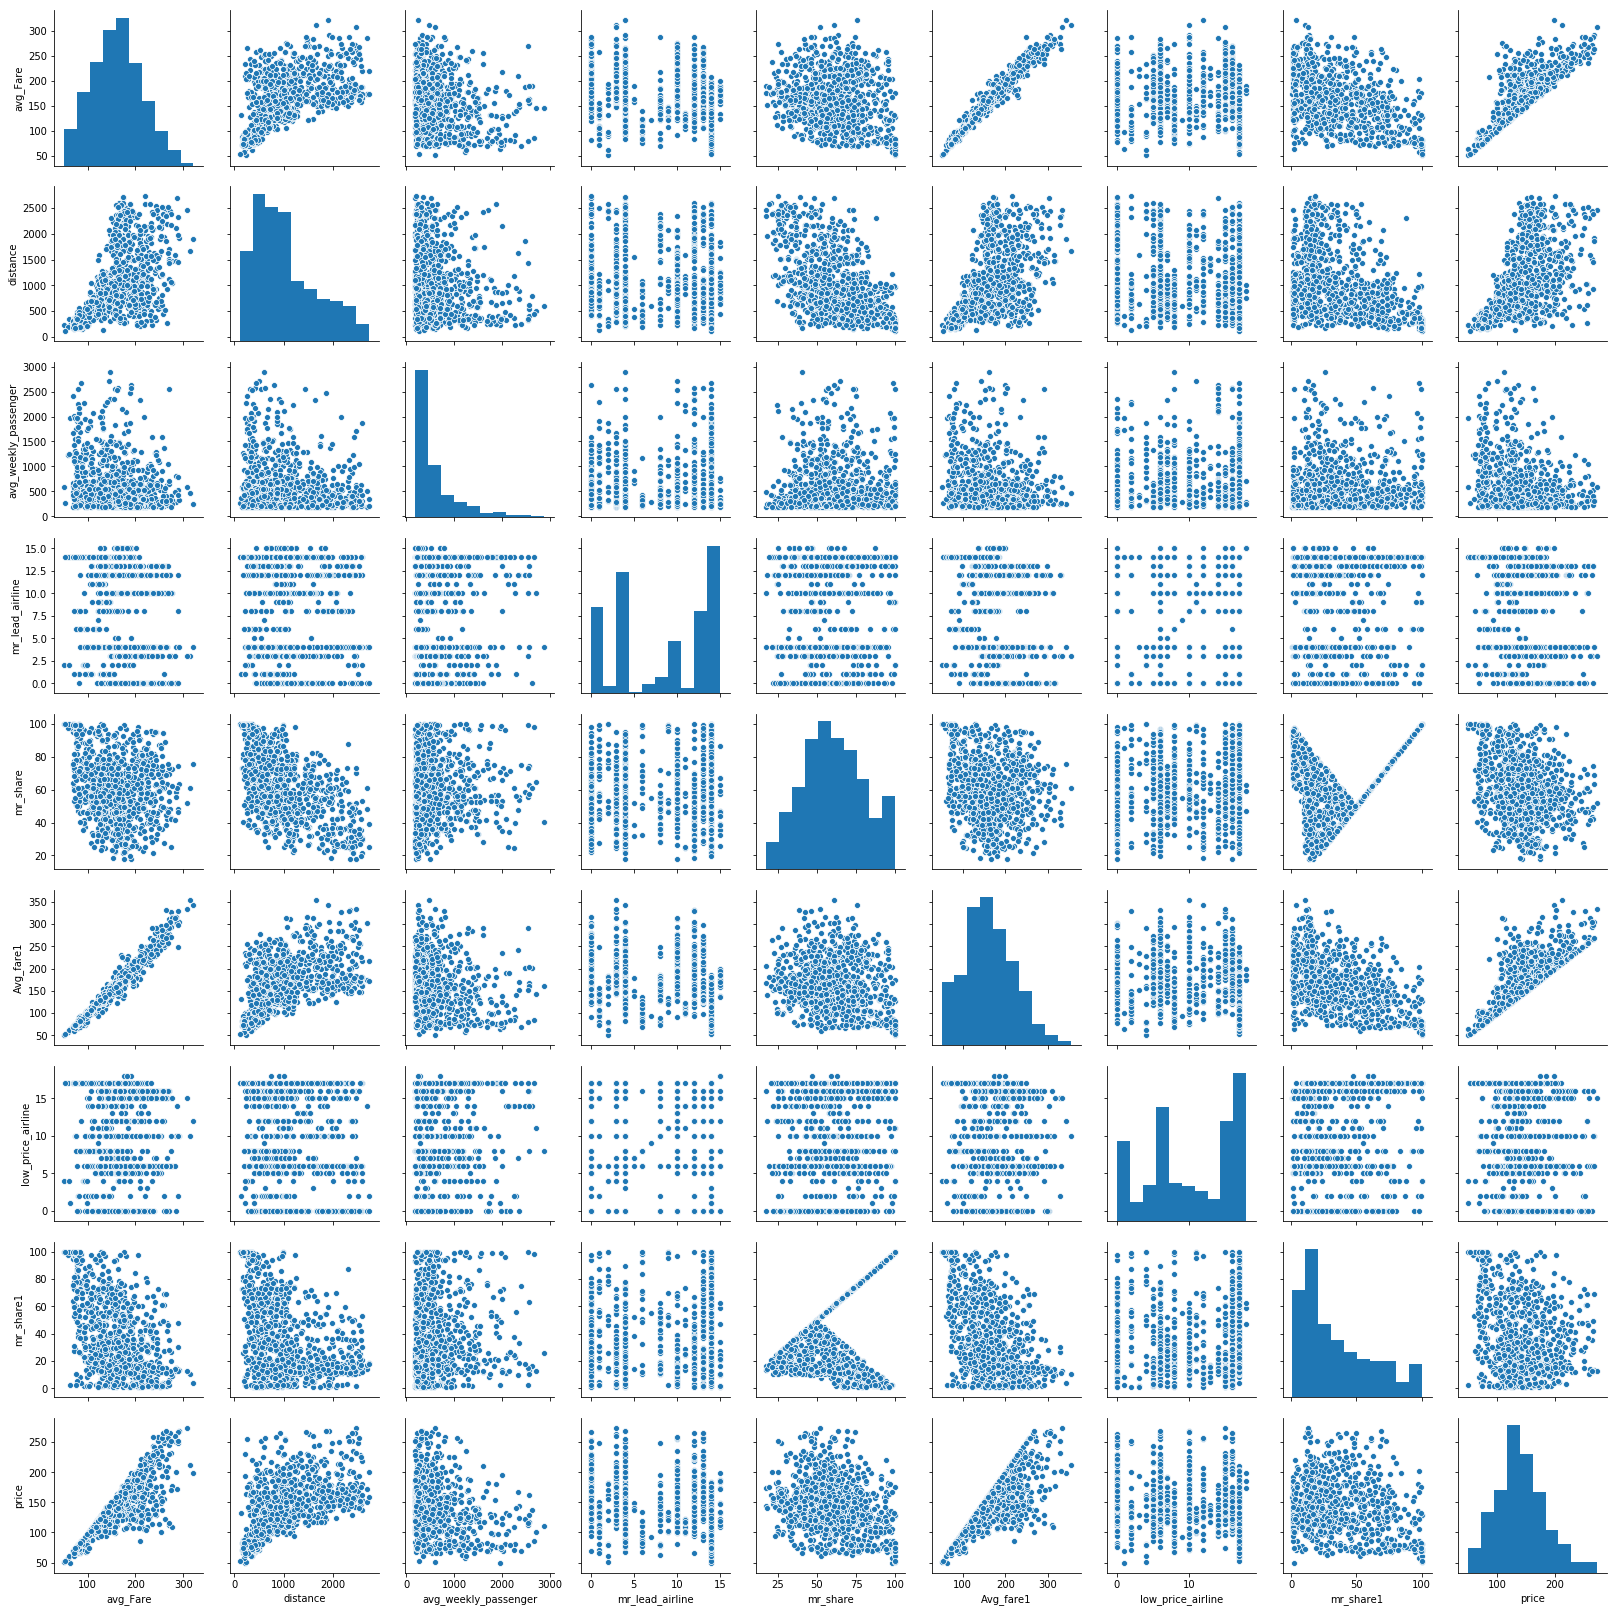

In [152]:
sns.pairplot(data_Q)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
X=data_Q.drop(['avg_Fare'],axis=1)
y=data_Q['avg_Fare']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [159]:
rgm=LinearRegression()
rgm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
rgm.coef_.shape

(8,)

In [164]:
rgm.coef_

array([ 0.00243358, -0.00177709, -0.19432417,  0.06121604,  0.730758  ,
        0.11936579, -0.03980504,  0.21370909])

In [163]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, rgm.coef_[idx]))

The coefficient for distance is 0.0024335817835931814
The coefficient for avg_weekly_passenger is -0.001777093356121806
The coefficient for mr_lead_airline is -0.19432416595489507
The coefficient for mr_share is 0.061216043944074594
The coefficient for Avg_fare1 is 0.7307579971159076
The coefficient for low_price_airline is 0.11936578994163577
The coefficient for mr_share1 is -0.03980503596217171
The coefficient for price is 0.21370908808624875


In [165]:
intercept = rgm.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.910480975002599


In [166]:
rgm.score(X_test, y_test)

0.972481514816236

In [0]:
## 2nd loop for
X=data_Q.drop(['avg_Fare','mr_lead_airline','low_price_airline',],axis=1)
y=data_Q['avg_Fare']

In [172]:
X.head()

,distance,avg_weekly_passenger,mr_share,Avg_fare1,mr_share1,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [174]:
rgm1=LinearRegression()
rgm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
for idx,col in enumerate(X.columns):
  print("The coefficient for {} is {}".format(col, rgm1.coef_[idx]))

The coefficient for distance is 0.0022376770011414606
The coefficient for avg_weekly_passenger is -0.0016712130288926152
The coefficient for mr_share is 0.06057607703860142
The coefficient for Avg_fare1 is 0.7368189120064085
The coefficient for mr_share1 is -0.037344014769286255
The coefficient for price is 0.21295884182955915


In [179]:
inte=rgm1.intercept_
print("The intercept for our model is {}".format(inte))

The intercept for our model is 6.751504252510159


In [180]:
rgm1.score(X_test,y_test)

0.9714676687561103